# Network Analysis Homework
### Marcus Millender
+ CSC 570 Data Science Essentials

#### Graph Centrality
1.  Download the ipython notebook titled 'network analysis.ipynb' from the class github.

2.  Answer the questions contained within the notebook

3.  Submit a link to your completed notebook.


In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Insert Data
M=nx.read_gml("polblogs.gml")

In [3]:
# create weighted graph from M
G = nx.Graph()
for u,v,data in M.edges_iter(data=True):
    if G.has_edge(u,v):
        G[u][v]['weight'] += 1
    else:
        G.add_edge(u, v, weight=1)

# Left Wing (L) = 0
notL = list(n for n,d in M.nodes_iter(data=True) if (d["value"]!=0))
ML = M.copy()
ML.remove_nodes_from(notL)
L = nx.Graph()
for u,v,data in ML.edges_iter(data=True):
    if L.has_edge(u,v):
        L[u][v]['weight'] += 1
    else:
        L.add_edge(u, v, weight=1) 

# Right Wing (R) = 1
notR = list(n for n,d in M.nodes_iter(data=True) if (d["value"]!=1))
MR = M.copy()
MR.remove_nodes_from(notR)
R = nx.Graph()
for u,v,data in MR.edges_iter(data=True):
    if R.has_edge(u,v):
        R[u][v]['weight'] += 1
    else:
        R.add_edge(u, v, weight=1)

### 1.  Create a nice looking graph of the political blog network

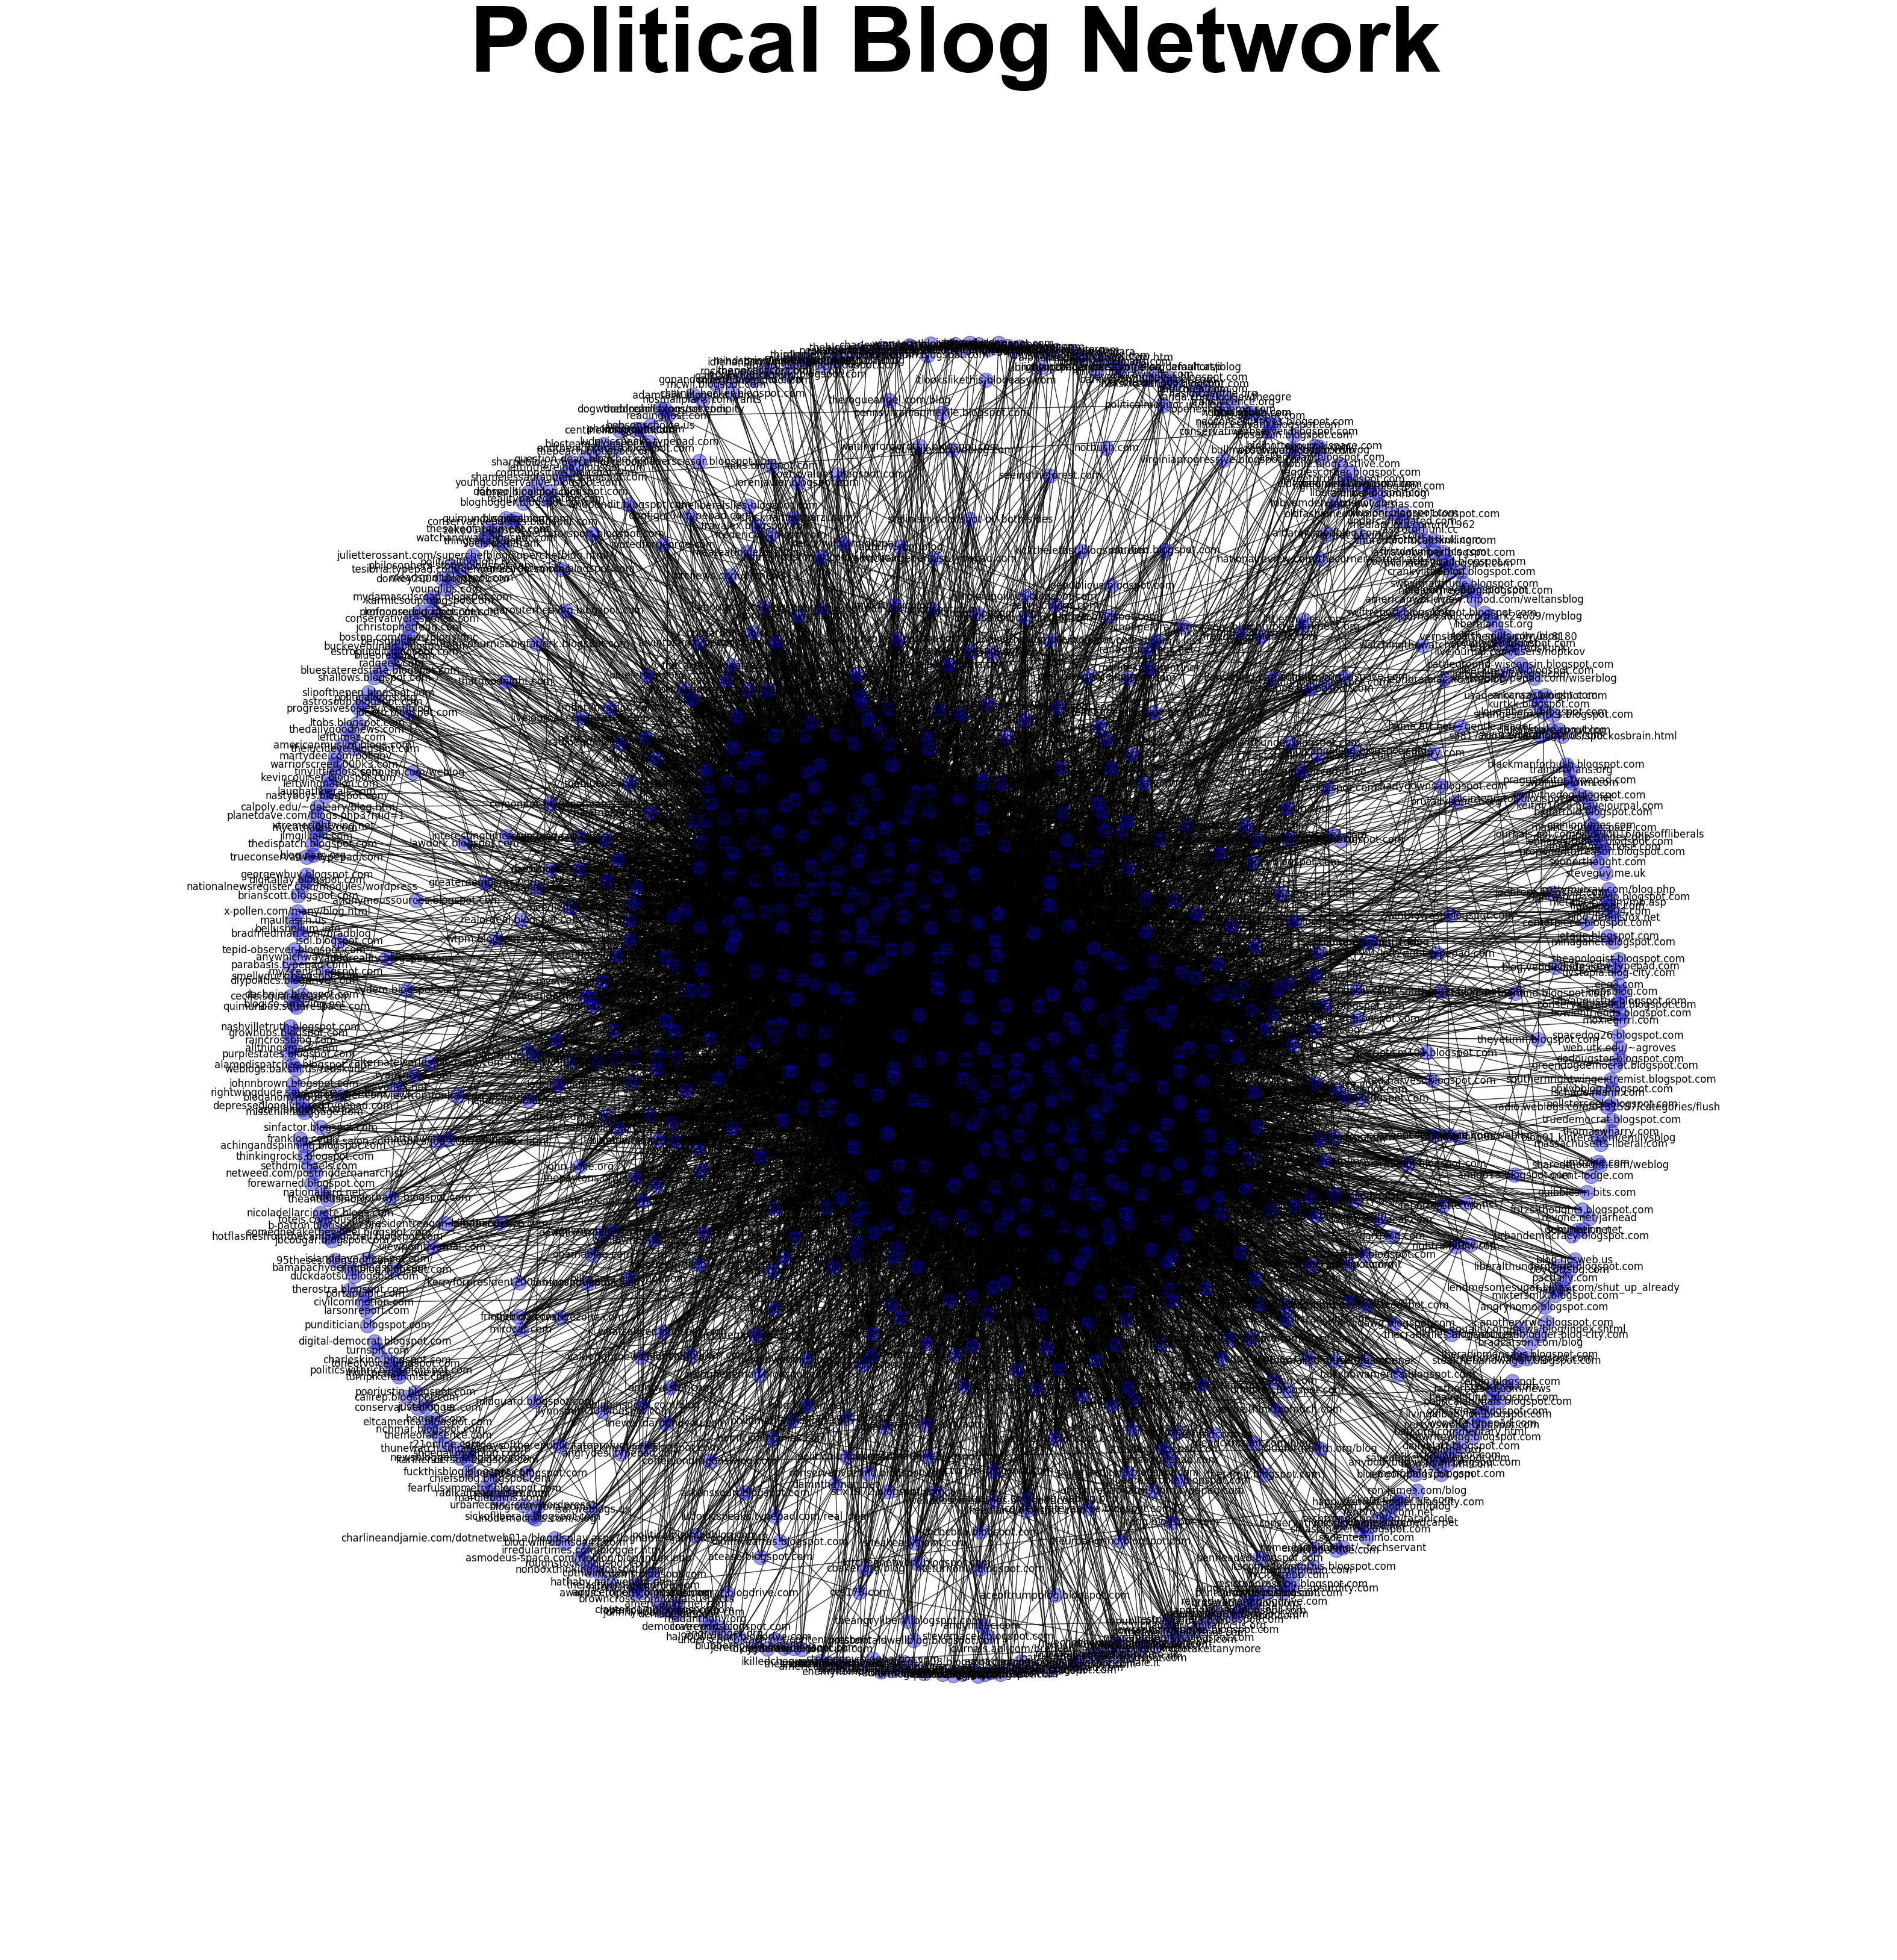

In [4]:
plt.figure(figsize=(40,40))
pos=nx.spring_layout(G, iterations=500, scale=5, k=5)
nx.draw_networkx_labels(G,pos,fontsize=8)
font = {'fontname'   : 'Arial',
            'color'      : 'k',
            'fontweight' : 'bold',
            'fontsize'   : 110}
plt.title("Political Blog Network", font)


nx.draw_networkx_nodes(G,pos,node_color='b',alpha=0.4)
nx.draw_networkx_edges(G,pos,alpha=0.8,node_size=0,width=1,edge_color='k')
plt.axis('off')
plt.show()

### 2.  What are the 10 most influential blogs?

In [5]:
centrality=nx.eigenvector_centrality(G)

In [6]:
blog_list = []
for node in centrality:
    blog_list.append((node,centrality[node]))
    
sorted_blog_list = blog_list.sort(key=lambda x: x[1])

In [7]:
#Return the top 10
sorted(blog_list, key=lambda x: x[1], reverse=True)[:10]

[('atrios.blogspot.com', 0.19480797936637695),
 ('dailykos.com', 0.16089740205234815),
 ('washingtonmonthly.com', 0.1465392425983687),
 ('digbysblog.blogspot.com', 0.14264369221718312),
 ('bodyandsoul.typepad.com', 0.14113489174330354),
 ('liberaloasis.com', 0.1395237157110787),
 ('tbogg.blogspot.com', 0.13703641699824246),
 ('corrente.blogspot.com', 0.12941759274096143),
 ('talkingpointsmemo.com', 0.12700519780790948),
 ('dneiwert.blogspot.com', 0.12237564692546016)]

### 3.  What are the 10 least influential blogs?



In [8]:
#Return the bottom 10
sorted(blog_list, key=lambda x: x[1], reverse=False)[:10]

[('thelonedem.com', 1.7763251097559638e-72),
 ('digital-democrat.blogspot.com', 1.7763251097559638e-72),
 ('americanworldview.tripod.com/weltansblog', 7.491540638916237e-09),
 ('quimundus.modblog.com', 6.68292997500648e-08),
 ('batr.org/commentary.html', 6.795517611554002e-07),
 ('batr.net', 6.796325594929456e-07),
 ('democratvoice.org', 1.0233388204113294e-06),
 ('quimundus.squarespace.com', 6.061741218869525e-06),
 ('massachusetts-liberal.com', 9.483365235734501e-06),
 ('thingsasitis.net', 1.1736249650658603e-05)]

### 4.  Answer this question for both left wing and right wing blogs seperately.  (Optional 10 Extra Credit Points)

### Left Wing Media

In [9]:
centrality=nx.eigenvector_centrality(L)
blog_list = []
for node in centrality:
    blog_list.append((node,centrality[node]))
    
sorted_blog_list = blog_list.sort(key=lambda x: x[1])

##### 10 Most Influential Liberal Blogs

In [10]:
sorted(blog_list, key=lambda x: x[1], reverse=True)[:10]

[('atrios.blogspot.com', 0.20960069262288034),
 ('dailykos.com', 0.1683696672625835),
 ('bodyandsoul.typepad.com', 0.15679455118140728),
 ('liberaloasis.com', 0.15611669689292249),
 ('digbysblog.blogspot.com', 0.15543641689579624),
 ('tbogg.blogspot.com', 0.15010365442195278),
 ('corrente.blogspot.com', 0.14485933101755424),
 ('washingtonmonthly.com', 0.13968149417405418),
 ('dneiwert.blogspot.com', 0.13474938566339847),
 ('pandagon.net', 0.13295188387217466)]

##### 10 Least Influential Liberal Blogs

In [11]:
sorted(blog_list, key=lambda x: x[1], reverse=False)[:10]

[('thelonedem.com', 2.3485107549626815e-19),
 ('democratvoice.org', 2.3485107549626815e-19),
 ('digital-democrat.blogspot.com', 2.3485107549626815e-19),
 ('enemykombatant.blogspot.com', 2.3485107549626815e-19),
 ('vernsblog.thegillfamily.us:8180', 7.219003827223703e-06),
 ('massachusetts-liberal.com', 1.1209610884941813e-05),
 ('thingsasitis.net', 1.2208135676401797e-05),
 ('loveamericahatebush.com', 2.2521194207629772e-05),
 ('eltcamerica.blogspot.com', 2.5858542294598843e-05),
 ('usademocrazy.blogspot.com', 3.54472969651666e-05)]

### Right Wing Media

In [12]:
centrality=nx.eigenvector_centrality(R)
blog_list = []
for node in centrality:
    blog_list.append((node,centrality[node]))
    
sorted_blog_list = blog_list.sort(key=lambda x: x[1])

##### 10 Most Influential Conservative Blogs

In [13]:
sorted(blog_list, key=lambda x: x[1], reverse=True)[:10]

[('instapundit.com', 0.21139123782218383),
 ('blogsforbush.com', 0.20315985849713214),
 ('hughhewitt.com', 0.17091799039890448),
 ('lashawnbarber.com', 0.15887443333047235),
 ('michellemalkin.com', 0.1474069323583247),
 ('powerlineblog.com', 0.14623996410167706),
 ('wizbangblog.com', 0.14567416434521382),
 ('littlegreenfootballs.com/weblog', 0.1391528925298146),
 ('vodkapundit.com', 0.13681297045170163),
 ('outsidethebeltway.com', 0.12258374528315186)]

##### 10 Least Influential Conservative Blogs

In [14]:
sorted(blog_list, key=lambda x: x[1], reverse=False)[:10]

[('poeticvalues.blogspot.com', 5.07307836371257e-28),
 ('markheimonen.blogspot.com', 5.07307836371257e-28),
 ('americanworldview.tripod.com/weltansblog', 5.68750932281198e-22),
 ('neoconswatch.blogspot.com', 1.0907559839799666e-21),
 ('batr.org/commentary.html', 1.51642936524587e-21),
 ('batr.net', 1.6179756529287955e-21),
 ('quimundus.modblog.com', 3.8876319746756753e-07),
 ('imprescindibile.ilcannocchiale.it', 1.6655958648503305e-05),
 ('quimundus.squarespace.com', 2.83478289655743e-05),
 ('depressedlonelybored.typepad.com', 0.00014278027072298576)]